### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [123]:
data = pd.read_csv('data/coupons.csv')

In [124]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [126]:
data.isna().sum()[data.isna().sum()>0]

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

  # Data cleanup
The car column will need to be dropped from the dataset as it has insufficient responses. The other missing data are from the columns detailing user visits to establishments. These entries will be kept as is and dealt with on a case by case basis.
The name of the "passanger" column is corrected to "passenger"

In [127]:
#drop the 'car' column
data2 = data.drop(['car'],axis=1)

#correct "passanger" to "passenger"
data2 = data2.rename(columns={"passanger": "passenger"})


The GEQ data is very misleading. If GEQ25 is marked as 1, then GEQ5 and GEQ15 are also marked as 1. So we create a new column that specifies the GEQ value as 5, 15 or 25 and dropping the "toCoupon_GEQxx" columns

In [128]:
conditions = [
    data2['toCoupon_GEQ5min'].eq(1) & data2['toCoupon_GEQ15min'].eq(1)& data2['toCoupon_GEQ25min'].eq(1),
    data2['toCoupon_GEQ5min'].eq(1) & data2['toCoupon_GEQ15min'].eq(1)& data2['toCoupon_GEQ25min'].eq(0),
    data2['toCoupon_GEQ5min'].eq(1) & data2['toCoupon_GEQ15min'].eq(0)& data2['toCoupon_GEQ25min'].eq(0)
]

choices = [25,15,5]

data2['toCoupon'] = np.select(conditions, choices, default=0)

data2 = data2.drop(['toCoupon_GEQ5min'],axis=1)
data2 = data2.drop(['toCoupon_GEQ15min'],axis=1)
data2 = data2.drop(['toCoupon_GEQ25min'],axis=1)

4. What proportion of the total observations chose to accept the coupon? 



In [129]:
data2['Y'].value_counts(normalize=True)[1]

0.5684326710816777

        Approximately 57% of the respondents accepted the coupon.

5. Use a bar plot to visualize the `coupon` column.

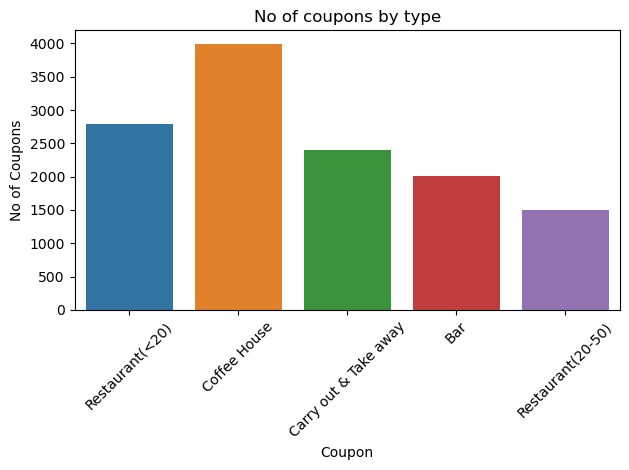

In [130]:
ax=sns.countplot(data2,x='coupon')
ax.set(xlabel='Coupon', ylabel='No of Coupons',title="No of coupons by type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

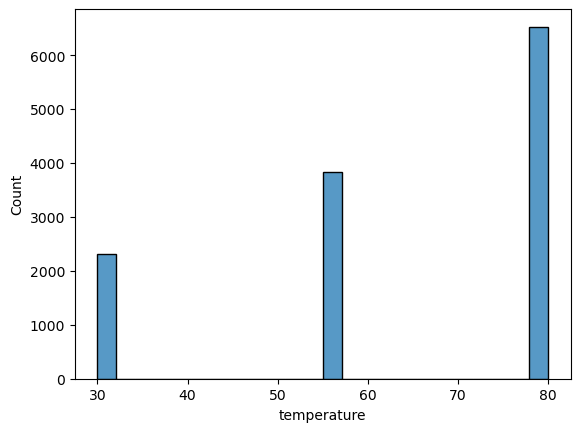

In [131]:
sns.histplot(data=data2, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [149]:
databarcoupon = data2[data2['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [133]:
BarPercAcc = databarcoupon['Y'].value_counts(normalize=True)[1]
BarPercAcc

0.41001487357461575

    41% of the Bar Coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [134]:
#Determine the total number of bar coupons given out
Total_bar_coupons = len(databarcoupon.index)

#group counts by bar and acceptance
BarGroups = databarcoupon.value_counts(['Bar','Y'])

#Number of coupons accepted by those who went to the bar 3 or fewer times a month.
barcountLE3 = BarGroups[[('never',1),('less1',1),('1~3',1)]].sum()
barcountLE3tot = BarGroups.loc[['never','less1','1~3'],:].sum()

#Number of coupons accepted by those who went to the bar more than 3 times a month.
barcountGE3 = BarGroups[[('4~8',1),('gt8',1)]].sum()
barcountGE3tot = BarGroups.loc[['4~8','gt8'],:].sum()

print("Acceptance rate of those who went to a bar 3 or fewer times a month =", barcountLE3/barcountLE3tot) 
print("Acceptance rate of those who went to a bar more than 3 times a month =", barcountGE3/barcountGE3tot) 



Acceptance rate of those who went to a bar 3 or fewer times a month = 0.37061769616026713
Acceptance rate of those who went to a bar more than 3 times a month = 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [135]:
#Group A = people who go to the bar more than once a month and are over the age of 25

#Group counts by age, bar and acceptance
AgeBarGroups = databarcoupon.value_counts(['age','Bar','Y'])

#Number of people in group A
grpA= AgeBarGroups.loc[["26","31","36","41","46","50plus"], ["1~3","4~8","gt8"]]
grpA_total = grpA.sum()

#Number of the above group that accepted the coupon
grpA_acc = grpA[:,:,1].sum()

#Number of people who do not belong to the group that go to the bar more than once a month and are over the age of 25
grpA_Others = AgeBarGroups.sum()-grpA.sum()

#Number of people in the other group that accepted the coupon
grpA_Others_acc = AgeBarGroups[:,:,1].sum() - grpA_acc

print("Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 =", 
      grpA_acc/grpA_total)
print("Acceptance rate of drivers who do not belong to the group that go to a bar more than once a month and are over the age of 25 =",
     grpA_Others_acc/grpA_Others)

Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 = 0.6952380952380952
Acceptance rate of drivers who do not belong to the group that go to a bar more than once a month and are over the age of 25 = 0.3343908629441624


People who frequent a bar more than once a month and are over the age of 25 are twice as likely to accept the bar coupon than the rest of the population.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [136]:
#Group B = People who go to bars more than once a month and had passengers that were not a kid and had occupations other
#than farming, fishing or forestry

#Group counts by passenger, occupation, bar and acceptance
PasOccBarGroups = databarcoupon.value_counts(['passenger','occupation','Bar','Y'])

#Number of people in group B
grpBComp=PasOccBarGroups.loc[['Kid(s)'],['Farming Fishing & Forestry'],:,:]
grpBsup = PasOccBarGroups.drop(grpBComp.index)
grpB = grpBsup.loc[:,:, ["1~3","4~8","gt8"]]
grpB_total = grpB.sum()

#Number of people in group B that accepted the coupon
grpB_acc = grpB[:,:,:,1].sum()

#Number of people who do not belong to the group that go to the bar more than once a month and are over the age of 25
grpB_Others = PasOccBarGroups.sum()-grpB.sum()

#Number of people in the other group that accepted the coupon
grpB_Others_acc = PasOccBarGroups[:,:,:,1].sum() - grpB_acc


print("Acceptance rate of drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry =", 
      grpB_acc/grpB_total)
print("Acceptance rate of drivers who do not belong to the above group =",
     grpB_Others_acc/grpB_Others)

Acceptance rate of drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = 0.6879194630872483
Acceptance rate of drivers who do not belong to the above group = 0.29214285714285715


This group is also more than twice as likely to use the coupon than the rest of the population.



.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [137]:
#Group C = go to bars more than once a month, had passengers that were not a kid, and were not widowed
#Group D = go to bars more than once a month and are under the age of 30
#Group E = go to cheap restaurants more than 4 times a month and income is less than 50K.

RelGroupcount = databarcoupon.value_counts(['passenger','age','maritalStatus','income','Bar','RestaurantLessThan20','Y'])

#Number of people in group C (there are no drivers who are widowed and driving with Kids)
grpC = RelGroupcount.loc[:,:,:,:,["1~3","4~8","gt8"],:,:]
grpC_total = grpC.sum()

#Number of people in group C that accepted the coupon
grpC_acc = grpC[:,:,:,:,:,:,1].sum()

#Number of people in group D
grpD = RelGroupcount.loc[:,["below21","21","26"],:,:,["1~3","4~8","gt8"],:,:]
grpD_total = grpD.sum()

#Number of people in group D that accepted the coupon
grpD_acc = grpD[:,:,:,:,:,:,1].sum()

#Number of people in group E
grpE = RelGroupcount.loc[:,:,:,["$12500 - $24999","$25000 - $37499","$37500 - $49999"],:,["4~8","gt8"],:]
grpE_total = grpE.sum()

#Number of people in group E that accepted the coupon
grpE_acc = grpE[:,:,:,:,:,:,1].sum()

print("Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed =", 
      grpC_acc/grpC_total)
print("go to bars more than once a month and are under the age of 30 =", 
      grpD_acc/grpD_total)
print("go to cheap restaurants more than 4 times a month and income is less than 50K =", 
      grpE_acc/grpE_total)

Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed = 0.6879194630872483
go to bars more than once a month and are under the age of 30 = 0.7217391304347827
go to cheap restaurants more than 4 times a month and income is less than 50K = 0.462406015037594


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The largest influencer of whether a person accepts a bar coupon seems to be whether the person goes to a bar more than once a month. To confirm this, let's make a correlation chart.

<Axes: >

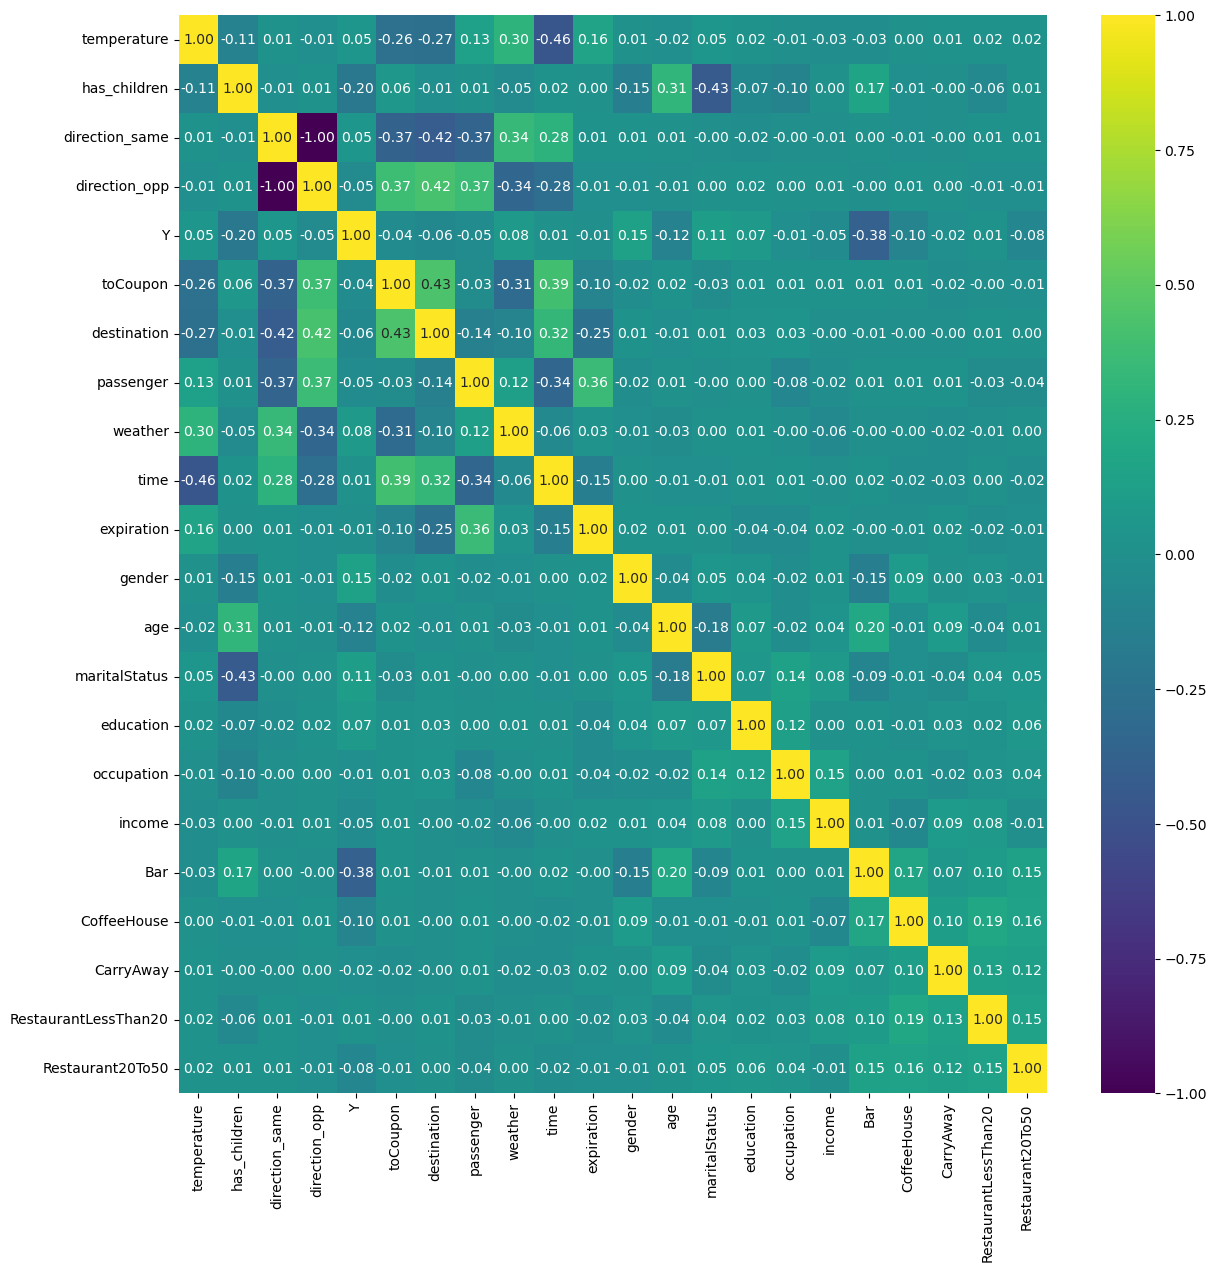

In [154]:
#drop the 'car' column
BarData = databarcoupon.drop(['coupon'],axis=1)
categorical_df=BarData.select_dtypes(include=['object'])
numerical_df=BarData.select_dtypes(include=['int64','int32'])
num_cat=categorical_df.apply(LabelEncoder().fit_transform)
num_df=pd.merge(numerical_df, num_cat, left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(num_df.corr(),annot=True, cmap="viridis", fmt=".2f")

The biggest influencer on accepting a bar coupon is the frequency of visiting a bar in a month. 
If we plot a bar plot of the "Bar" column, we can see that the acceptance rate is higher when the person is a more frequent visitor of a bar.

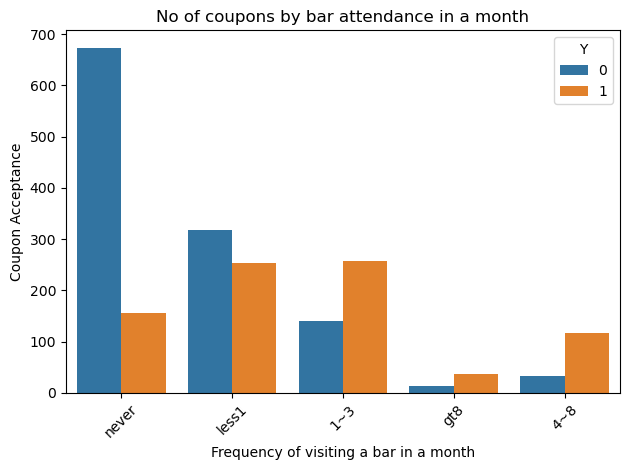

In [141]:
ax2=sns.countplot(databarcoupon,x='Bar',hue='Y')
ax2.set(xlabel='Frequency of visiting a bar in a month', ylabel='Coupon Acceptance',title="No of coupons by bar attendance in a month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's investigate the coffe house coupon. Creating a new dataframe that contains the Coffee House coupon and dropping the "coupon" column in the new dataframe as it is irrelevant

In [142]:
CofData = data2[data2['coupon']=='Coffee House']
CofData = CofData.drop(['coupon'],axis=1)

1. Proportion of Coffee House Coupons that were accepted

In [143]:
CofPercAcc = CofData['Y'].value_counts(normalize=True)[1]
CofPercAcc

0.49924924924924924

    Approximately half the coffee house coupons were accepted.

2. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [157]:
#Determine the total number of coffee coupons given out
Total_cof_coupons = len(CofData.index)

#group counts by coffeeHouse and acceptance
CofGroups = CofData.value_counts(['CoffeeHouse','Y'])

#Number of coupons accepted by those who went to the coffee House 3 or fewer times a month.
CofcountLE3 = CofGroups[[('never',1),('less1',1),('1~3',1)]].sum()
CofcountLE3tot = CofGroups.loc[['never','less1','1~3'],:].sum()

#Number of coupons accepted by those who went to the coffee House more than 3 times a month.
CofcountGE3 = CofGroups[[('4~8',1),('gt8',1)]].sum()
CofcountGE3tot = CofGroups.loc[['4~8','gt8'],:].sum()

print("Acceptance rate of those who went to a coffee house 3 or fewer times a month =", CofcountLE3/CofcountLE3tot) 
print("Acceptance rate of those who went to a coffee house more than 3 times a month =", CofcountGE3/CofcountGE3tot) 



Acceptance rate of those who went to a coffee house 3 or fewer times a month = 0.44940867279894875
Acceptance rate of those who went to a coffee house more than 3 times a month = 0.675


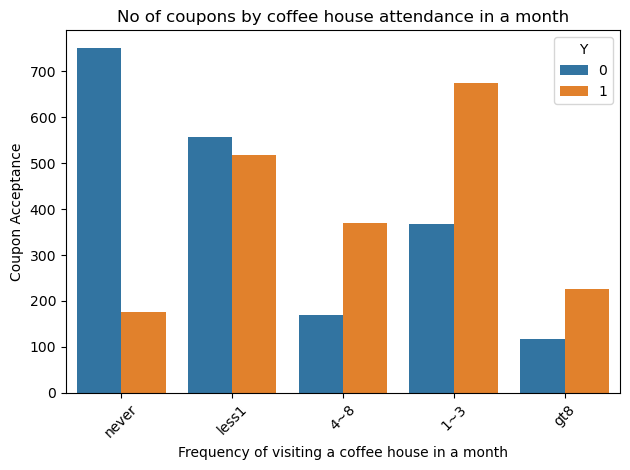

In [158]:
#plotting a bar plot of the "CoffeeHouse" column
ax3=sns.countplot(CofData,x='CoffeeHouse',hue='Y')
ax3.set(xlabel='Frequency of visiting a coffee house in a month', ylabel='Coupon Acceptance',title="No of coupons by coffee house attendance in a month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this case also, the more frequently the driver visits a coffee house, the more likely they are to accept the coffee house coupon.

<Axes: >

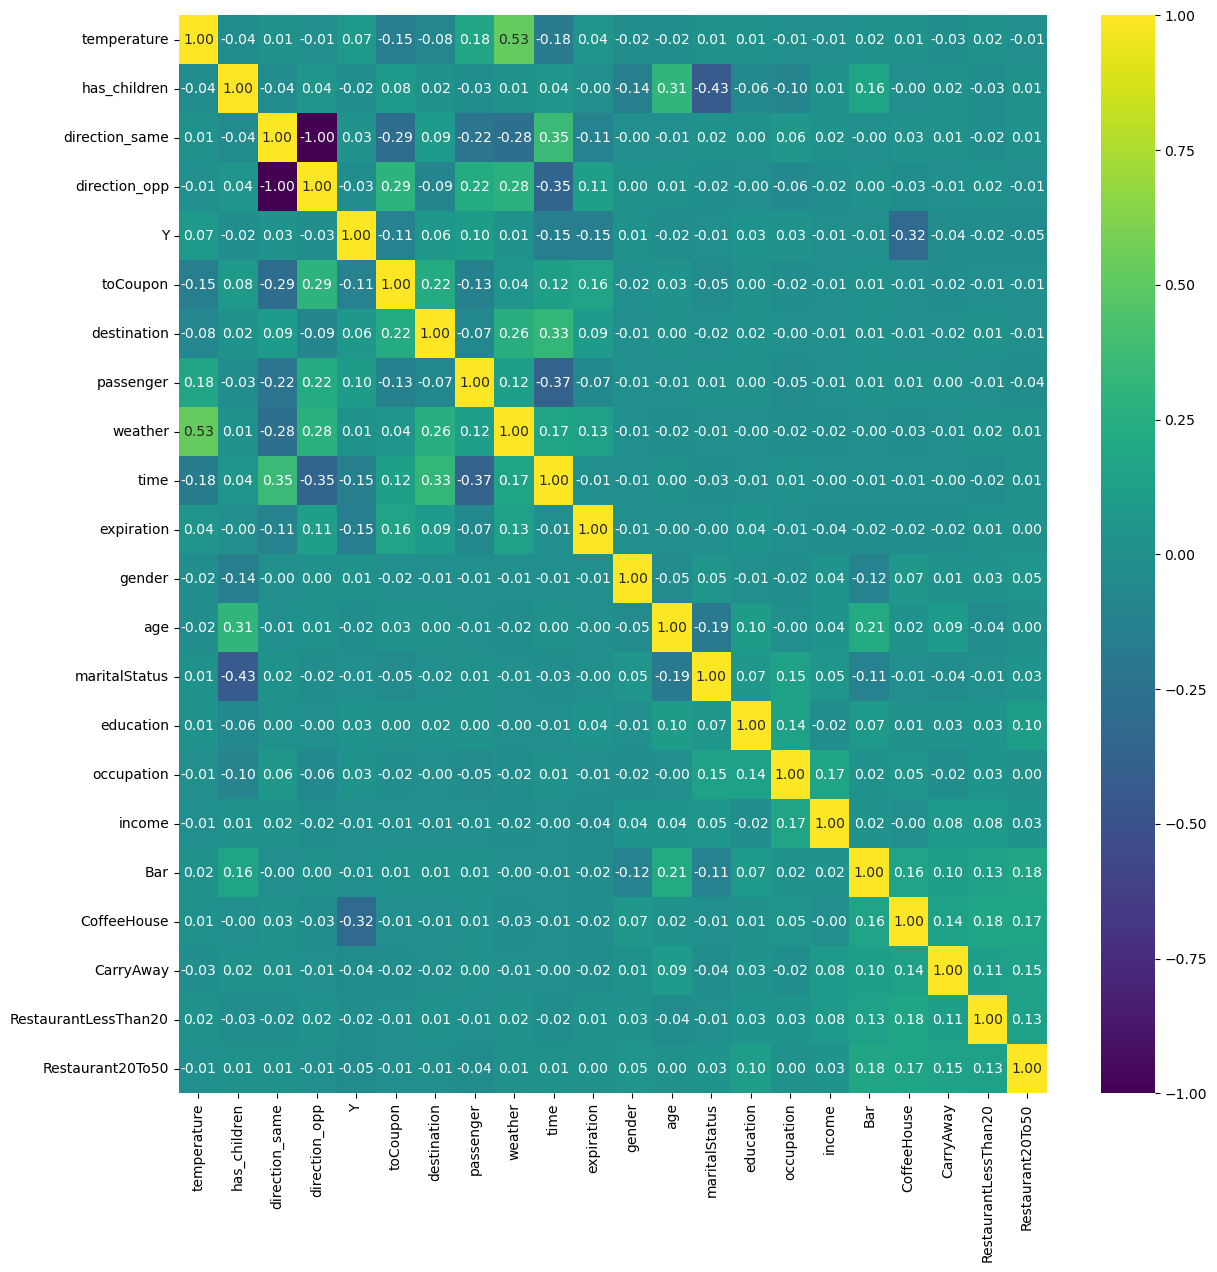

In [156]:
#Plotting a correlation chart
categorical_df1=CofData.select_dtypes(include=['object'])
numerical_df1=CofData.select_dtypes(include=['int64','int32'])
num_cat1=categorical_df1.apply(LabelEncoder().fit_transform)
num_df1=pd.merge(numerical_df1, num_cat1, left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(num_df1.corr(),annot=True, cmap="viridis", fmt=".2f")


In this case also we see that the coupon acceptance is highly correlated to the frequency of attanding a coffee house. The next highly correlated factors are the time to expiration, the time of the day and the distance to the coffee house. Let's consider the time to expiration.

In [160]:

#group counts by time to expiration, coffeeHouse and acceptance
CofGroups2 = CofData.value_counts(['expiration','CoffeeHouse','Y'])

#Number of coupons accepted with short expiry and by people who visited a coffeehouse less than 3 times a month.
Cofcount2h = CofGroups2.loc[['2h'],['never','less1','1~3'],1].sum()
Cofcount2htot = CofGroups2.loc[['2h'],['never','less1','1~3'],:].sum()

#Number of coupons accepted with short expiry and by people who visited a coffeehouse more than 3 times a month.
Cofcount2hfr = CofGroups2.loc[['2h'],['4~8','gt8'],1].sum()
Cofcount2hfrtot = CofGroups2.loc[['2h'],['4~8','gt8'],:].sum()

#Number of coupons accepted with long expiry and by those who went to the coffee House less than 3 times a month.
Cofcount1d = CofGroups2.loc[['1d'],['never','less1','1~3'],1].sum()
Cofcount1dtot = CofGroups2.loc[['1d'],['never','less1','1~3'],:].sum()

#Number of coupons accepted with long expiry and by those who went to the coffee House more than 3 times a month.
Cofcount1dfr = CofGroups2.loc[['1d'],['4~8','gt8'],1].sum()
Cofcount1dfrtot = CofGroups2.loc[['1d'],['4~8','gt8'],:].sum()

print("Acceptance rate of short expiry coupons by those who went to a coffee house 3 or fewer times a month =", Cofcount2h/Cofcount2htot)
print("Acceptance rate of long expiry coupons by those who went to a coffee house 3 or fewer times a month =", Cofcount1d/Cofcount1dtot)
print("Acceptance rate of short expiry coupons by those who went to a coffee house more than 3 times a month =", Cofcount2hfr/Cofcount2hfrtot) 
print("Acceptance rate of long expiry coupons by those who went to a coffee house more than 3 times a month =", Cofcount1dfr/Cofcount1dfrtot) 


Acceptance rate of short expiry coupons by those who went to a coffee house 3 or fewer times a month = 0.3962594973699591
Acceptance rate of long expiry coupons by those who went to a coffee house 3 or fewer times a month = 0.5176294073518379
Acceptance rate of short expiry coupons by those who went to a coffee house more than 3 times a month = 0.5635593220338984
Acceptance rate of long expiry coupons by those who went to a coffee house more than 3 times a month = 0.803921568627451


In [173]:
#Adding the time factor into the mix
CofGroups3 = CofData.value_counts(['time','expiration','CoffeeHouse','Y'])

#Number of coupons accepted with short expiry and by people who visited a coffeehouse less than 3 times a month.
Coftime10AM = CofGroups3.loc[['10AM'],['1d'],['4~8','gt8'],1].sum()
Coftime10AMtot = CofGroups3.loc[['10AM'],['1d'],['4~8','gt8'],:].sum()
print("Acceptance rate of long expiry coupons at 6pm by those who went to a coffee house more than 3 times a month =", Coftime10AM/Coftime10AMtot) 

Acceptance rate of long expiry coupons at 6pm by those who went to a coffee house more than 3 times a month = 0.8717948717948718


# Result
From the above summary, if a coffee house coupon is given to a frequent coffee house visitor at 10AM in the morning and it has a long expiry, then it will almost certainly be accepted.
